# Plotly Tutorial

## Indexs:

1. [Install the required Libraries](#install_libraries)
2. [Import the libraries](#imports)
3. [Basics](#basics)

## <span id="install_libraries">**1. Install the Required Packages:**</span>

In [ ]:
!pip install plotly, cufflinks, chart_studio

## <span id="imports">**2. Import**</span>

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

## <span id="basics">**3. Basics**</span>

In [3]:
arr_1 = np.random.rand(50, 4)
df_1 = pd.DataFrame(arr_1, columns=["A", "B", "C", "D"])
df_1.head()

,A,B,C,D
0,0.319342,0.258229,0.253125,0.256209
1,0.288938,0.692082,0.062768,0.035694
2,0.435509,0.594070,0.757712,0.840236
3,0.410826,0.801835,0.857571,0.857512
4,0.445214,0.586419,0.231146,0.200946


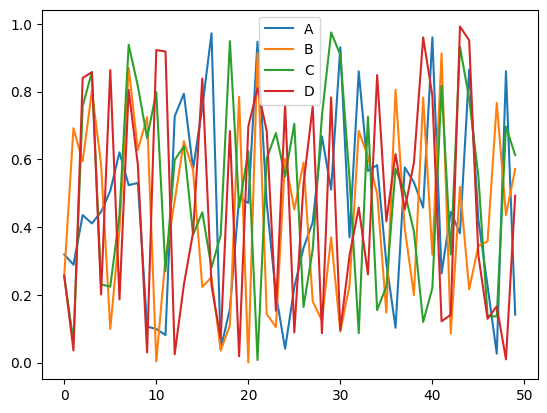

In [6]:
df_1.plot()
plt.show()

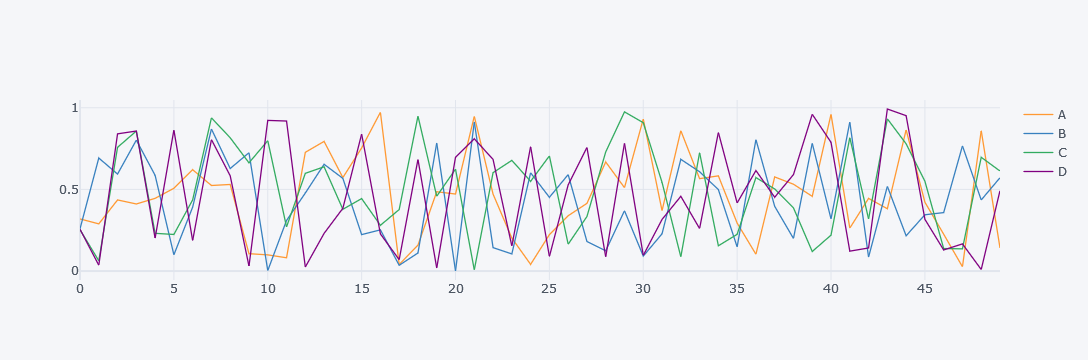

In [7]:
df_1.iplot()

## <span id="line_plots">**4. Line Plots**</span>

In [11]:
df_stocks = px.data.stocks()

df_stocks.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


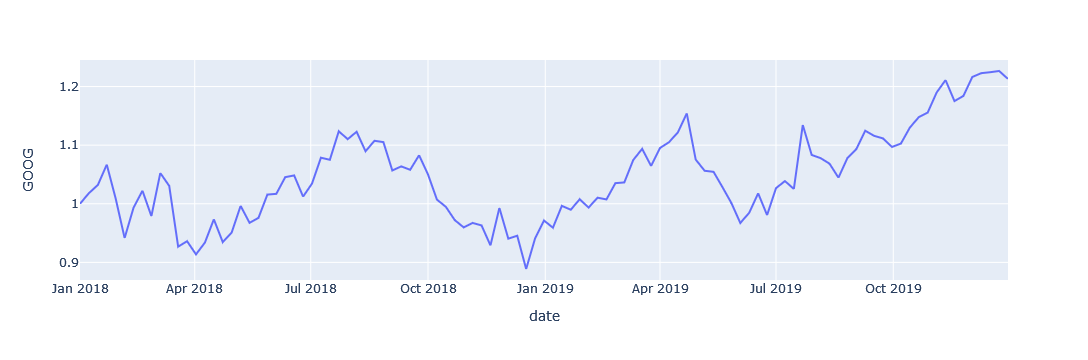

In [13]:
px.line(df_stocks, x="date", y="GOOG", labels={"x": "Date", "y": "Price"})

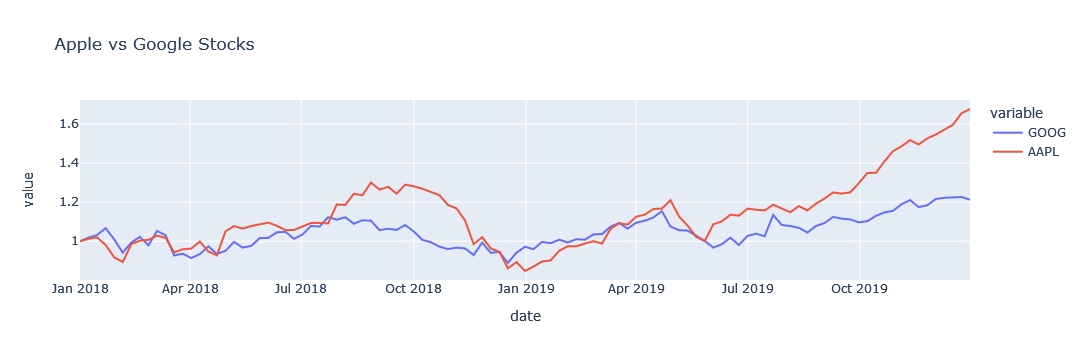

In [14]:
px.line(df_stocks, x="date", y=["GOOG", "AAPL"], labels={"x": "Date", "y": "Price"}, 
        title="Apple vs Google Stocks")

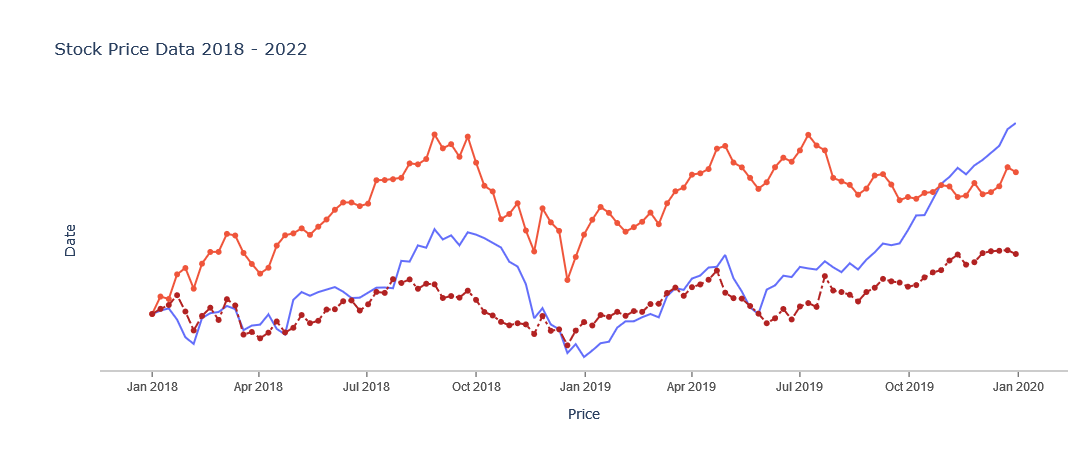

In [23]:
fig = go.Figure()
# Apple stock line plot
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AAPL"],
                        mode="lines", name="Apple"))
# Amazon stock line plot
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["AMZN"],
                        mode="lines+markers", name="Amazon"))
# Google stock line plot
fig.add_trace(go.Scatter(x=df_stocks["date"], y=df_stocks["GOOG"],
                        mode="lines+markers", name="Google",
                        line=dict(color="firebrick", width=2, dash="dashdot")))
# Customize the chart
fig.update_layout(
    # customize the x-axis styles
    xaxis = dict(showline=True, showgrid=False, showticklabels=True,
                linecolor="rgb(204, 204, 204)", linewidth=2, 
                ticks="outside", # ticks={"outside", "inside"}
                # define the font styles of the x-axis
                tickfont=dict(
                    family="Arial",
                    size=12,
                    color="rgb(82, 82, 82)"
                )),
    # customize the y-axis styles
    yaxis = dict(showgrid=False, zeroline=False, showline=False, 
                showticklabels=False),
    autosize = False,
    # Set margin; l=left, r=right, t=top 
    margin = dict(autoexpand=False, l=100, r=20, t=110,),
    showlegend = False,
    # change background color
    plot_bgcolor = "white",
    # Add title, x axis label & y axis label
    title = "Stock Price Data 2018 - 2022",
    xaxis_title = "Price",
    yaxis_title = "Date"
)

## <span id="bar_charts">**5. Bar Charts**</span>

In [24]:
df_usa = px.data.gapminder().query("country == 'United States'")
df_usa.sample(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1617,United States,Americas,1997,76.81,272911760,35767.43303,USA,840
1614,United States,Americas,1982,74.65,232187835,25009.55914,USA,840


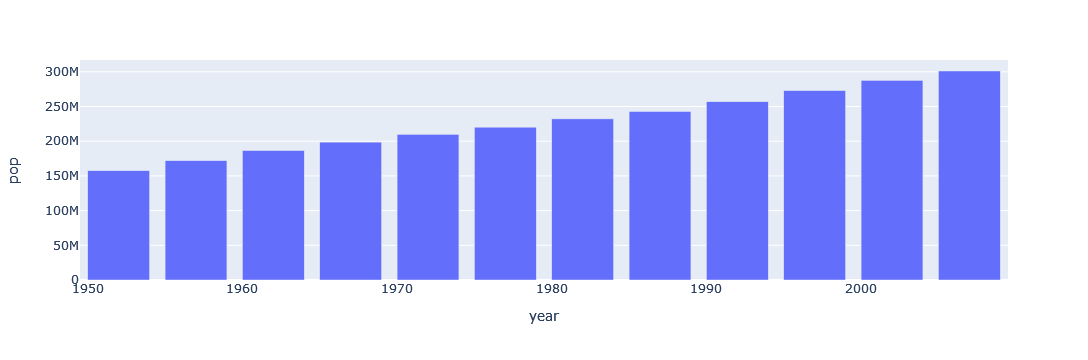

In [25]:
px.bar(df_usa, x="year", y="pop")

In [26]:
df_tips = px.data.tips()
df_tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
64,17.59,2.64,Male,No,Sat,Dinner,3
32,15.06,3.00,Female,No,Sat,Dinner,2
96,27.28,4.00,Male,Yes,Fri,Dinner,2


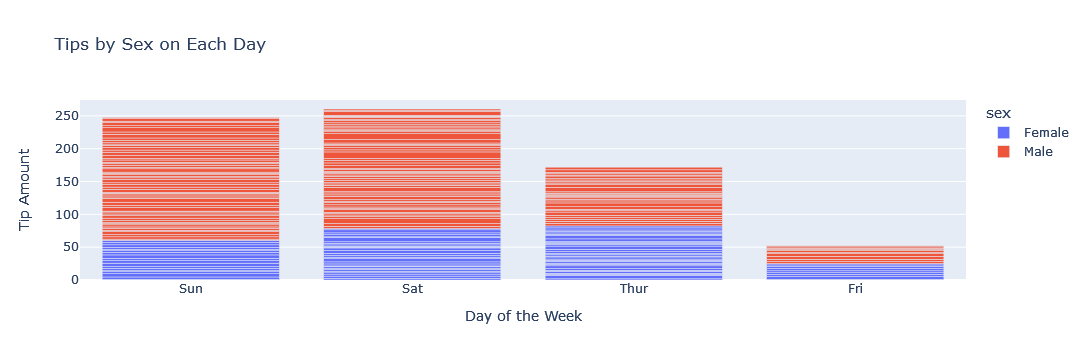

In [27]:
px.bar(df_tips, x="day", y="tip", color="sex", title="Tips by Sex on Each Day",
      labels={"tip": "Tip Amount", "day": "Day of the Week"})

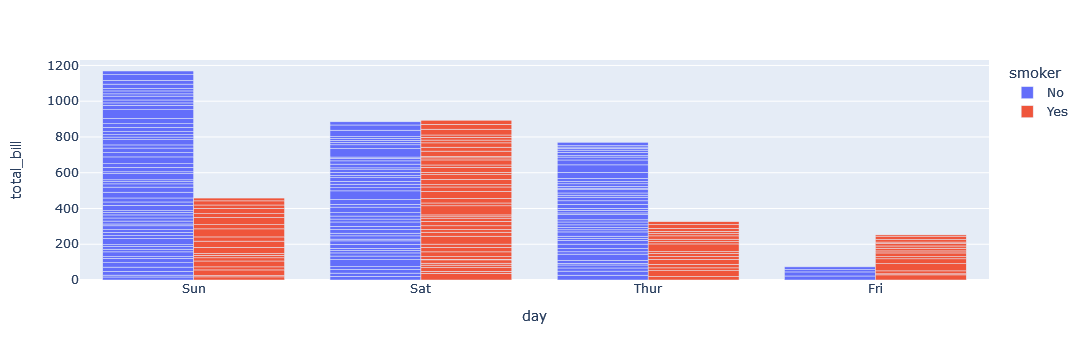

In [28]:
px.bar(df_tips, x="day", y="total_bill", color="smoker", 
      barmode="group")

In [29]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.36")
df_europe.sample(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
683,Hungary,Europe,2007,73.338,9956108,18008.94444,HUN,348
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907,CHE,756


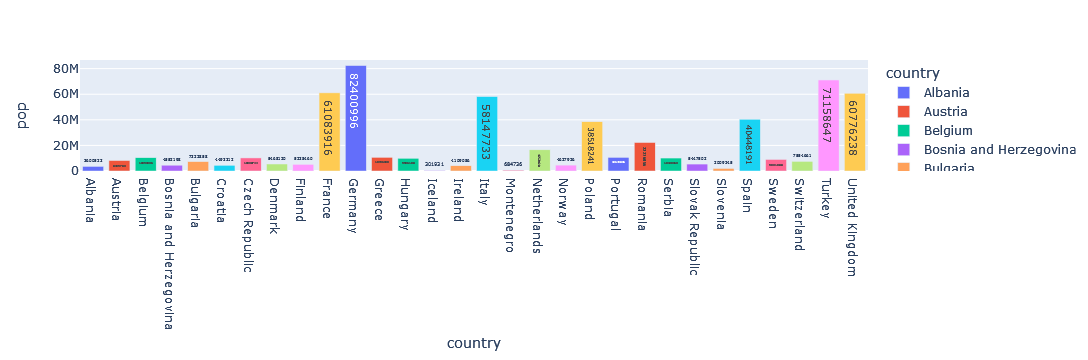

In [31]:
# text = the pop up test while hovering
fig = px.bar(df_europe, y="pop", x="country", text="pop", color="country")
fig

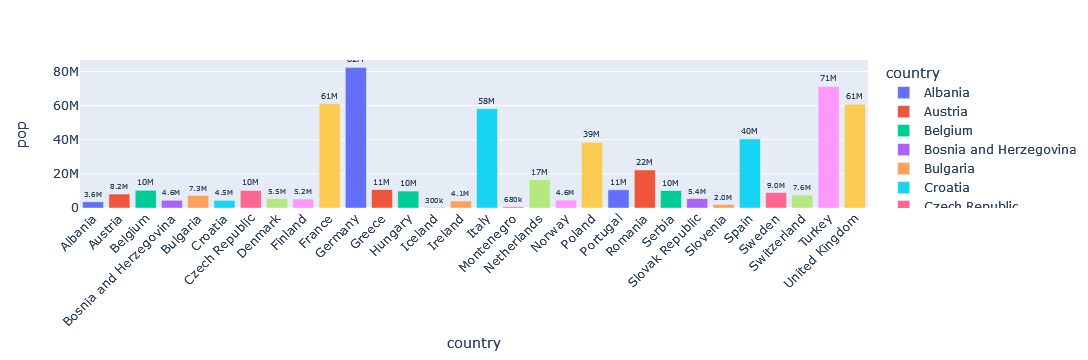

In [36]:
# text = the pop up test while hovering
fig = px.bar(df_europe, y="pop", x="country", text="pop", color="country")
fig.update_traces(
    texttemplate = '%{text:.2s}',
    textposition = "outside",
)
fig.update_layout(uniformtext_minsize = 8, xaxis_tickangle=-45)

## <span id="scatter_plots">**6. Scatter Plots**</span>